In [1]:
import pandas as pd
df_covid = pd.read_csv('/content/NYC_CovidData.csv')
df_covid.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT
0,07-09-2024,606,373,80,2,496,835,65,2,105
1,07-10-2024,615,413,71,3,509,852,67,2,122
2,07-11-2024,585,398,71,2,543,915,69,2,112
3,07-12-2024,574,339,80,3,551,920,72,2,97
4,07/13/2024,384,305,51,5,551,927,70,2,80


# **Data Exploration and Cleaning**

In [2]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date_of_interest         91 non-null     object
 1   CASE_COUNT               91 non-null     int64 
 2   PROBABLE_CASE_COUNT      91 non-null     int64 
 3   HOSPITALIZED_COUNT       91 non-null     int64 
 4   DEATH_COUNT              91 non-null     int64 
 5   CASE_COUNT_7DAY_AVG      91 non-null     int64 
 6   ALL_CASE_COUNT_7DAY_AVG  91 non-null     int64 
 7   HOSP_COUNT_7DAY_AVG      91 non-null     int64 
 8   DEATH_COUNT_7DAY_AVG     91 non-null     int64 
 9   BX_CASE_COUNT            91 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 7.2+ KB


In [3]:
df_covid.describe()

,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,406.362637,263.637363,49.373626,1.945055,420.274725,694.329670,51.527473,2.032967,72.582418
std,179.350403,126.919617,23.253028,1.463350,138.880369,246.506707,19.662339,0.924368,33.548329
min,26.000000,2.000000,0.000000,0.000000,117.000000,175.000000,3.000000,0.000000,4.000000
25%,267.500000,167.500000,36.500000,1.000000,319.000000,520.500000,39.000000,2.000000,48.500000
50%,388.000000,254.000000,51.000000,2.000000,421.000000,676.000000,54.000000,2.000000,72.000000
75%,529.000000,340.000000,67.500000,3.000000,551.500000,926.500000,68.500000,3.000000,102.000000
max,837.000000,563.000000,91.000000,5.000000,638.000000,1085.000000,77.000000,4.000000,139.000000


In [4]:
df_covid.isnull().sum()

,0
date_of_interest,0
CASE_COUNT,0
PROBABLE_CASE_COUNT,0
HOSPITALIZED_COUNT,0
DEATH_COUNT,0
CASE_COUNT_7DAY_AVG,0
ALL_CASE_COUNT_7DAY_AVG,0
HOSP_COUNT_7DAY_AVG,0
DEATH_COUNT_7DAY_AVG,0
BX_CASE_COUNT,0


In [5]:
from scipy import stats
df_covid['z_score_cases'] = stats.zscore(df_covid['CASE_COUNT'])

In [6]:
df_covid = df_covid[(df_covid['z_score_cases'].abs() <= 3)]

In [7]:
df_covid['date_of_interest'] = pd.to_datetime(df_covid['date_of_interest'], format='%m/%d/%Y', errors='coerce')


# **Data Analysis**

In [8]:
summary_stats = df_covid[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']].describe()
print(summary_stats)

       CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT
count   91.000000           91.000000    91.000000
mean   406.362637           49.373626     1.945055
std    179.350403           23.253028     1.463350
min     26.000000            0.000000     0.000000
25%    267.500000           36.500000     1.000000
50%    388.000000           51.000000     2.000000
75%    529.000000           67.500000     3.000000
max    837.000000           91.000000     5.000000


**Total Cases, Hospitalizations, and Deaths Over Time**

In [9]:
total_cases = df_covid['CASE_COUNT'].sum()
total_hospitalizations = df_covid['HOSPITALIZED_COUNT'].sum()
total_deaths = df_covid['DEATH_COUNT'].sum()

print(f"Total COVID-19 Cases: {total_cases}")
print(f"Total Hospitalizations: {total_hospitalizations}")
print(f"Total Deaths: {total_deaths}")

Total COVID-19 Cases: 36979
Total Hospitalizations: 4493
Total Deaths: 177


**Peak Days for Cases, Hospitalizations, and Deaths**

In [10]:
peak_cases_day = df_covid[df_covid['CASE_COUNT'] == df_covid['CASE_COUNT'].max()]['date_of_interest'].values[0]
peak_cases_value = df_covid['CASE_COUNT'].max()

#date with the maximum number of hospitalizations
peak_hospitalizations_day = df_covid[df_covid['HOSPITALIZED_COUNT'] == df_covid['HOSPITALIZED_COUNT'].max()]['date_of_interest'].values[0]
peak_hospitalizations_value = df_covid['HOSPITALIZED_COUNT'].max()

#date with the maximum number of deaths
peak_deaths_day = df_covid[df_covid['DEATH_COUNT'] == df_covid['DEATH_COUNT'].max()]['date_of_interest'].values[0]
peak_deaths_value = df_covid['DEATH_COUNT'].max()

print(f"Peak COVID-19 Cases Day: {peak_cases_day} with {peak_cases_value} cases")
print(f"Peak Hospitalizations Day: {peak_hospitalizations_day} with {peak_hospitalizations_value} hospitalizations")
print(f"Peak Deaths Day: {peak_deaths_day} with {peak_deaths_value} deaths")

Peak COVID-19 Cases Day: 2024-07-22T00:00:00.000000000 with 837 cases
Peak Hospitalizations Day: 2024-07-15T00:00:00.000000000 with 91 hospitalizations
Peak Deaths Day: 2024-07-13T00:00:00.000000000 with 5 deaths


**7-Day Rolling Averages**

In [11]:
df_covid['7day_avg_cases'] = df_covid['CASE_COUNT'].rolling(window=7).mean()
df_covid['7day_avg_hospitalized'] = df_covid['HOSPITALIZED_COUNT'].rolling(window=7).mean()
df_covid['7day_avg_deaths'] = df_covid['DEATH_COUNT'].rolling(window=7).mean()

print(df_covid[['date_of_interest', '7day_avg_cases', '7day_avg_hospitalized', '7day_avg_deaths']].head(10))

  date_of_interest  7day_avg_cases  7day_avg_hospitalized  7day_avg_deaths
0              NaT             NaN                    NaN              NaN
1              NaT             NaN                    NaN              NaN
2              NaT             NaN                    NaN              NaN
3              NaT             NaN                    NaN              NaN
4       2024-07-13             NaN                    NaN              NaN
5       2024-07-14             NaN                    NaN              NaN
6       2024-07-15      555.571429              73.857143         2.857143
7       2024-07-16      572.285714              74.571429         3.000000
8       2024-07-17      575.714286              73.285714         2.714286
9       2024-07-18      583.142857              74.857143         2.428571


**Daily Increase or Decrease in Cases**

In [12]:
df_covid['daily_case_change'] = df_covid['CASE_COUNT'].diff()
df_covid['daily_hospitalization_change'] = df_covid['HOSPITALIZED_COUNT'].diff()
df_covid['daily_death_change'] = df_covid['DEATH_COUNT'].diff()

df_covid[['date_of_interest', 'daily_case_change', 'daily_hospitalization_change', 'daily_death_change']].head(10)

,date_of_interest,daily_case_change,daily_hospitalization_change,daily_death_change
0,NaT,NaN,NaN,NaN
1,NaT,9.0,-9.0,1.0
2,NaT,-30.0,0.0,-1.0
3,NaT,-11.0,9.0,1.0
4,2024-07-13,-190.0,-29.0,2.0
5,2024-07-14,14.0,22.0,0.0
6,2024-07-15,329.0,18.0,-5.0
7,2024-07-16,-4.0,-6.0,3.0
8,2024-07-17,-84.0,-23.0,-2.0
9,2024-07-18,-2.0,20.0,-1.0


# **Data Visualization**

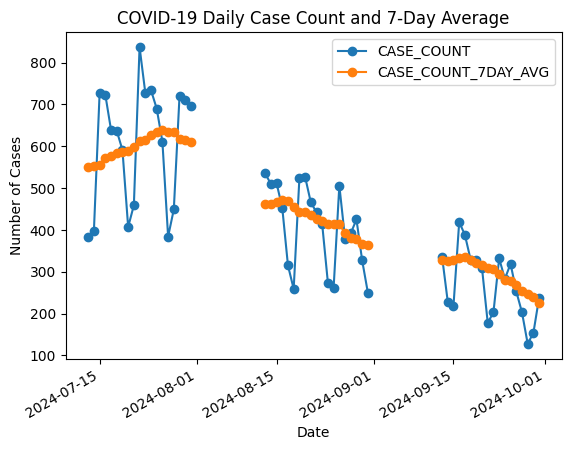

In [14]:
import matplotlib.pyplot as plt

df_covid['date_of_interest'] = pd.to_datetime(df_covid['date_of_interest'])
df_covid.set_index('date_of_interest')[['CASE_COUNT', 'CASE_COUNT_7DAY_AVG']].plot(kind='line', marker='o')
plt.title('COVID-19 Daily Case Count and 7-Day Average')
plt.ylabel('Number of Cases')
plt.xlabel('Date')
plt.show()


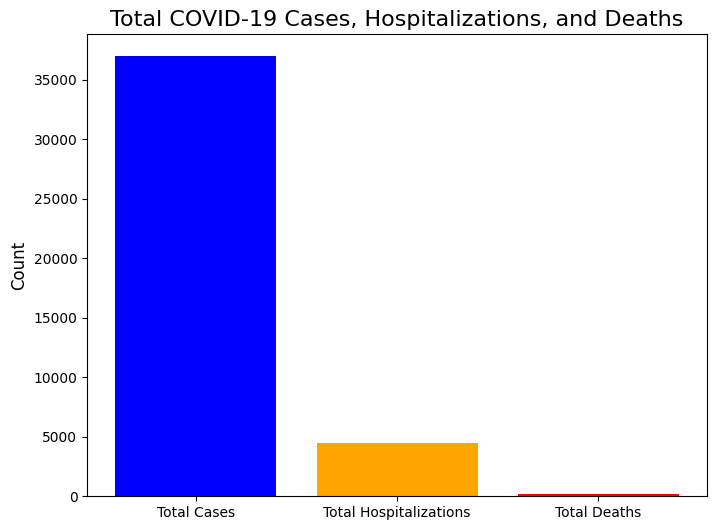

In [18]:
totals = [total_cases, total_hospitalizations, total_deaths]
categories = ['Total Cases', 'Total Hospitalizations', 'Total Deaths']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, totals, color=['blue', 'orange', 'red'])
plt.title('Total COVID-19 Cases, Hospitalizations, and Deaths', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.show()

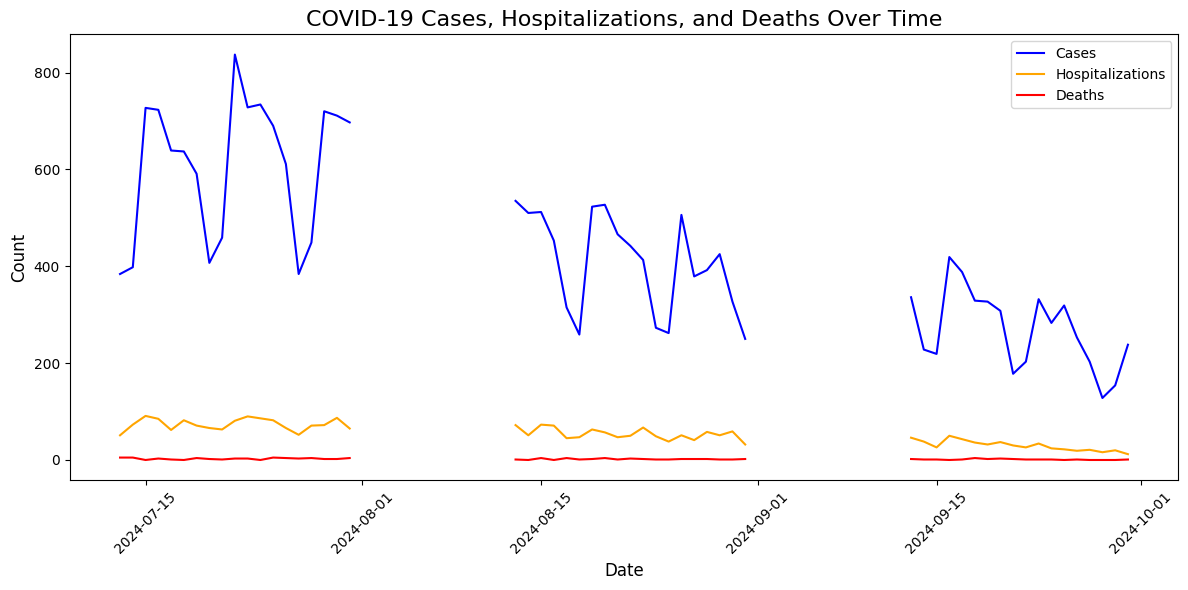

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df_covid['date_of_interest'], df_covid['CASE_COUNT'], label='Cases', color='blue')
plt.plot(df_covid['date_of_interest'], df_covid['HOSPITALIZED_COUNT'], label='Hospitalizations', color='orange')
plt.plot(df_covid['date_of_interest'], df_covid['DEATH_COUNT'], label='Deaths', color='red')
plt.title('COVID-19 Cases, Hospitalizations, and Deaths Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

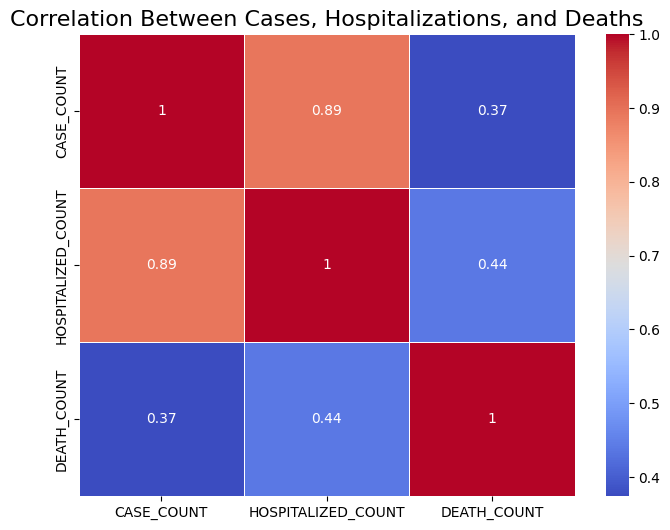

In [19]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df_covid[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Cases, Hospitalizations, and Deaths', fontsize=16)
plt.show()

# **SQL Queries**

In [20]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=c240e5c74859553213428e824e7b3ff677d8e4968c1966cf810828edb5feeb5d
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [22]:
import pandasql as ps

In [25]:
import pandasql as ps


query = """
SELECT
    SUM(CASE_COUNT) AS Total_Cases,
    SUM(HOSPITALIZED_COUNT) AS Total_Hospitalizations,
    SUM(DEATH_COUNT) AS Total_Deaths
FROM df_covid;
"""
result = ps.sqldf(query, locals())
result

,Total_Cases,Total_Hospitalizations,Total_Deaths
0,36979,4493,177


gives an overall view of the total impact of COVID-19 by aggregating the total number of cases, hospitalizations, and deaths.

In [28]:
import pandasql as ps

query = """
SELECT
    date_of_interest,
    CASE_COUNT
FROM df_covid
WHERE CASE_COUNT > 1000
ORDER BY date_of_interest ASC;
"""

result = ps.sqldf(query, locals())
print(result)


Empty DataFrame
Columns: [date_of_interest, CASE_COUNT]
Index: []


filters the data for significant spikes in daily case counts, allowing identification of severe outbreak days.

In [30]:
query = """
SELECT
    AVG(CASE_COUNT_7DAY_AVG) AS Avg_Case_Count_7Day_Avg,
    AVG(HOSP_COUNT_7DAY_AVG) AS Avg_Hospitalized_7Day_Avg,
    AVG(DEATH_COUNT_7DAY_AVG) AS Avg_Death_Count_7Day_Avg
FROM df_covid;
"""

result = ps.sqldf(query, locals())
print(result)

   Avg_Case_Count_7Day_Avg  Avg_Hospitalized_7Day_Avg  \
0               420.274725                  51.527473   

   Avg_Death_Count_7Day_Avg  
0                  2.032967  


provides a summary of the average trends for cases, hospitalizations, and deaths over a rolling 7-day period.

In [32]:
query = """
SELECT
    date_of_interest,
    BX_CASE_COUNT
FROM df_covid
ORDER BY BX_CASE_COUNT DESC
LIMIT 1;
"""

# Execute the query using pandasql
result = ps.sqldf(query, locals())
print(result)

             date_of_interest  BX_CASE_COUNT
0  2024-07-31 00:00:00.000000            139


focuses on a specific borough (the Bronx) to highlight the single worst day in terms of case count.

In [34]:
query = """
SELECT
    strftime('%Y-%m', date_of_interest) AS Month,
    SUM(CASE_COUNT) AS Total_Cases,
    SUM(HOSPITALIZED_COUNT) AS Total_Hospitalizations,
    SUM(DEATH_COUNT) AS Total_Deaths
FROM df_covid
GROUP BY strftime('%Y-%m', date_of_interest)
ORDER BY Month ASC;
"""

# Execute the query using pandasql
result = ps.sqldf(query, locals())
print(result)

     Month  Total_Cases  Total_Hospitalizations  Total_Deaths
0     None        12839                    1543            71
1  2024-07        11526                    1396            51
2  2024-08         7769                    1022            34
3  2024-09         4845                     532            21


offers monthly totals, allowing for a more granular analysis of how COVID-19 evolved over time, month by month

# **Challenges Faced**

The dataset had missing records for certain dates, which distorted time series analyses like trends in daily cases, hospitalizations, or deaths.

Due to reporting delays or errors, certain days may show unusually high or low counts (outliers) for cases, hospitalizations, or deaths. These outliers can affect the overall analysis of trends.

# **Future Steps:**

 Integrate geographic data to create an interactive heatmap that visualizes the spread of COVID-19 cases across different regions, down to the neighborhood level. This can be done by merging the COVID-19 dataset with geographical boundary data.


 Build a time series forecasting model (e.g., ARIMA, Prophet, LSTM) to predict future COVID-19 case counts, hospitalizations, or deaths based on historical trends. This model can also incorporate external variables, such as mobility data or vaccination rates, to improve the accuracy of predictions.